In [1]:
# Final Analysis

# 1. It's easy to tell from all data points that Capomulin out performs the feild. 

# 2. The final summary table shows that Capomulin is the only drug which had a positve affect on 
# tumor growth. It had a 19% reduction in Tumor Volume. The other drugs actually made it worse!

# 3. The biggest data point that stuck out to me was that Capomulin's survival rate was more than double
# that of the other drugs at 90%.

In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedf = pd.read_csv(mouse_drug_data_to_load)
trialdf = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(mousedf,trialdf, on="Mouse ID")

# Display the data table for preview
merged.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupdf = merged.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']

# Convert to DataFrame
meandf = groupdf.mean().reset_index()

# Preview DataFrame
meandf.head(2)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = groupdf.sem()

# Convert to DataFrame
std_error = pd.DataFrame(std_error).reset_index()

# Preview DataFrame
std_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pivotdf = meandf.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivotdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


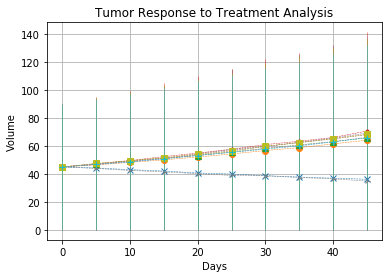

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivotdf.index, pivotdf["Capomulin"], yerr=pivotdf["Capomulin"], marker="x", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Ceftamin"], yerr=pivotdf["Ceftamin"], marker="o", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Infubinol"], yerr=pivotdf["Infubinol"], marker="^", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Ketapril"], yerr=pivotdf["Ketapril"], marker=".", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Naftisol"], yerr=pivotdf["Naftisol"], marker="1", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Placebo"], yerr=pivotdf["Placebo"], marker="2", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Propriva"], yerr=pivotdf["Propriva"], marker="3", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Ramicane"], yerr=pivotdf["Ramicane"], marker="4", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Stelasyn"], yerr=pivotdf["Stelasyn"], marker="s", linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotdf.index, pivotdf["Zoniferol"], yerr=pivotdf["Zoniferol"], marker="+", linestyle="dashed", linewidth=0.50)

# make it look sexy
plt.grid(True)
plt.title('Tumor Response to Treatment Analysis')
plt.ylabel('Volume')
plt.xlabel('Days')

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
meta_response = merged.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
meta_response = pd.DataFrame(meta_response)
# Preview DataFrame
meta_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_response_sem = merged.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
meta_response_sem = pd.DataFrame(meta_response_sem)
# Preview DataFrame
meta_response_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
meta_response = meta_response.reset_index()
meta_response_pivot = meta_response.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
meta_response_pivot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


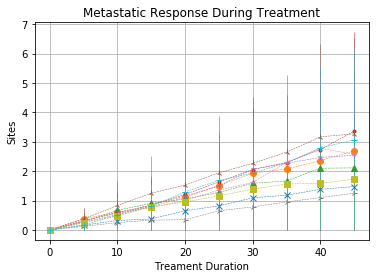

In [10]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Capomulin"], yerr=meta_response_pivot["Capomulin"], marker="x", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Ceftamin"], yerr=meta_response_pivot["Ceftamin"], marker="o", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Infubinol"], yerr=meta_response_pivot["Infubinol"], marker="^", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Ketapril"], yerr=meta_response_pivot["Ketapril"], marker=".", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Naftisol"], yerr=meta_response_pivot["Naftisol"], marker="1", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Placebo"], yerr=meta_response_pivot["Placebo"], marker="2", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Propriva"], yerr=meta_response_pivot["Propriva"], marker="3", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Ramicane"], yerr=meta_response_pivot["Ramicane"], marker="4", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Stelasyn"], yerr=meta_response_pivot["Stelasyn"], marker="s", linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_response_pivot.index, meta_response_pivot["Zoniferol"], yerr=meta_response_pivot["Zoniferol"], marker="+", linestyle="dashed", linewidth=0.50)

plt.grid(True)
plt.title('Metastatic Response During Treatment')
plt.ylabel('Sites')
plt.xlabel('Treament Duration')

# Save the Figure
plt.savefig("Metastatic_Response_to_Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = merged.groupby(["Drug", "Timepoint"])["Mouse ID"]
count_mice = mice_group.nunique()
count_mice = pd.DataFrame(count_mice)

# Convert to DataFrame
count_mice.reset_index(inplace=True)
count_mice = count_mice.rename(columns={'Mouse ID':'Count'})
# Preview DataFrame
count_mice.head()

,Drug,Timepoint,Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_pivot = count_mice.pivot(index='Timepoint',columns='Drug',values='Count')

# Preview the Data Frame
count_mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


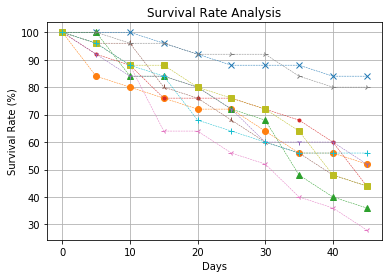

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * count_mice_pivot["Capomulin"] / 25, marker="x", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Ceftamin"] / 25, marker="o", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Infubinol"] / 25, marker="^", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Ketapril"] / 25, marker=".", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Naftisol"] / 25, marker="1", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Placebo"] / 25, marker="2", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Propriva"] / 25, marker="3", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Ramicane"] / 25, marker="4", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Stelasyn"] / 25, marker="s", linestyle="dashed", linewidth=0.50)
plt.plot(100 * count_mice_pivot["Zoniferol"] / 25, marker="+", linestyle="dashed", linewidth=0.50)

# make it sexy
plt.grid(True)
plt.title('Survival Rate Analysis')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Days')

# Save the Figure
plt.savefig("Survival_Rates.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug (tumor volumes pivotdf*)
tum_vol_change = (pivotdf.iloc[-1]/pivotdf.iloc[0]-1)*100

# Display the data to confirm
tum_vol_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

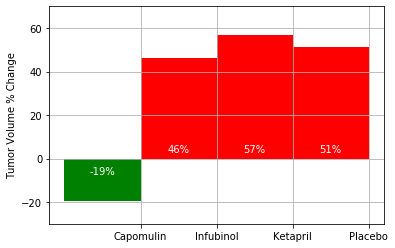

In [18]:
# Store all Relevant Percent Changes into a Tuple
tum_vol_change_tuple = (tum_vol_change["Capomulin"], 
               tum_vol_change["Infubinol"], 
               tum_vol_change["Ketapril"], 
               tum_vol_change["Placebo"],
               )

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
potato = np.arange(len(tum_vol_change_tuple))  
drugPass = ax.bar(potato[0], tum_vol_change_tuple[0], 1, color='green')
drugFail = ax.bar(potato[1:], tum_vol_change_tuple[1:], 1, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.grid(True)
ax.set_ylabel('Tumor Volume % Change')
ax.set_xticks(potato + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylim([-30,70])
ax.set_autoscaley_on(False)

# Use functions to label the percentages of changes
def autolabelPass(drug):
    for drug in drug:
        height = drug.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(drug.get_x() + drug.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

def autolabelFail(drug):
    for drug in drug:
        height = drug.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(drug.get_x() + drug.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
        
# Call functions to implement the function calls
autolabelPass(drugPass)
autolabelFail(drugFail)

# Save the Figure
plt.savefig("Summary_Bar_Graph.png")

# Show the Figure
fig.show()